## Welcome to Video2Music!

This notebook is designed to be run on CPU. Before executing it, you need to set up an environment and install some things, to do that just follow the guide in the Readme.
The demo is based on the code by [Kang et al. (2024)](https://github.com/AMAAI-Lab/Video2Music/tree/main).

In the first part of this notebook, you can use a video for which you would like to generate matching music. As the encoding of the video is very resource-intense, in the second part you can play around with the audio generation part, trying to modify the output by setting the emotion and semantic setting by yourself.

## Getting started with Video-audio generation

### Video2Music model
Quick reminder here, how the inference works:


*  **Feature Extraction:** the chord primer sequence is encoded as well as the different video features, namely
    * semantic and emotion via CLIP
    * scene offset via PySceneDetect
    * motion via RGB difference

*   **ATM encoder**: the video features are passed through the Affective Multimodal Transformer encoder using Multihead Attention
* **ATM decoder**: combines music and ATM encoded Video features, using Cross-Attention; each new chord is conditioned on the previously generated chord
* **Post-Processing**: a Bi-GRU gets the video features as input and determines from it the density and loudness of the chord sequence






Now, we can run the inference. Depending on the length of your video, this may take a while, up to 1 hour or, depending on your available resources, might crash in between. In that case, I would advice you to use the colab notebook provided in the gitlab. Otherwise, use the time to make a cup of coffee which you can enjoy when listening to the wonderful music you get out of it! You can also try it with different chord sequences as primers. For that purpose, you have the chord-emotion table here again as a reference, also to know what different chords are possible.

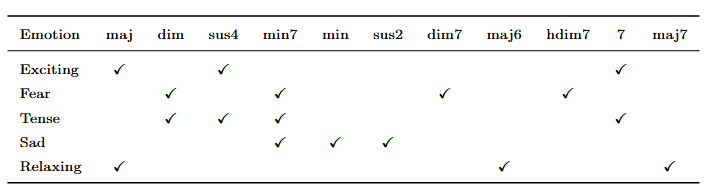

In [ ]:
from video2music import Video2music


input_video = "bird.mp4" #adjust this path if you want to use your own video

# modify that to your liking, check the table for different options
# but be aware - a major chord is NOT C maj, but just C; a minor chord is defined as Cm
# the rest you can just use as indicated in the table:)
input_primer = "C Am Gsus2 Gm"

# C major or A minor
input_key = "C major"

video2music = Video2music()

#generate the music video
output_filename = video2music.generate(input_video, input_primer, input_key)

Overwriting inference_script.py


This cell executes the script!

### Audio Generation without Video Input

Since generating the music video can take a lot of time, I wrote a function to only generate the audio while being able to manipulate the emotion and semantics feature. So, you get the opportunity to choose by yourself which emotions you want to convey. You can play around with the different tensors ands see, what an imact it has on the generated audio.

This is the script for the audio generation, again, you can execute via the cell below.

In [ ]:
from video2music import Video2music
import torch

seed=42
torch.manual_seed(seed=seed)
# this is the semantic embedding vector, you can also try different versions by adjusting the Seed
semantic = torch.randn(300, 768)

# 0: exciting, 1: fearful, 2: tense, 3: sad, 4: relaxing, 5: neutral
emotion_tensor = torch.zeros(300, 6)

# like this, the whole video would be very relaxing, for different emotions, change the index
emotion_tensor[:, 4] = 1.0  # should range between 0.0 and 1.0, defines the intensity of the emotion

# adjust this to you liking (again check the table above for the different options)
primer = "Cmaj7 Gm7 Amdim7 Fhdim7" # you might also try what happens if the emotion tensor defined above contradicts the emotions conveyed by the chords:)

# C major or A minor
key = "A minor"


video2music = Video2music()
# generate the audio
output_filename = video2music.audio_generate(emotion_tensor, semantic, primer, key)

Overwriting audio_script.py
